In [5]:
import requests
import json
from bs4 import BeautifulSoup
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import itertools
from __future__ import unicode_literals
import matplotlib
from operator import itemgetter
from collections import Counter
%matplotlib inline  
!mkdir ./img
!mkdir ./render

EVENT_SHORTHAND = 'SGDQ'
EVENT_YEAR = 2017
ATTRIBUTION = 'BenjaminCongdon.me, © 2017'


mkdir: ./img: File exists
mkdir: ./render: File exists


### Load from JSON

In [6]:
with open ('scraped_games.json', 'r') as f:
    actual_games = json.load(f)

# Graphs

In [7]:
# Utility Functions
def add_info(ax, x1, y1, x2, y2, src='Source: Gamesdonequick.com & Giantbomb.com'):
    ax.text(x1, y1, src,
         horizontalalignment='right',
         verticalalignment='center',
         transform = ax.transAxes,
         fontsize=8)
    ax.text(x2, y2, ATTRIBUTION,
         horizontalalignment='left',
         verticalalignment='center',
         transform = ax.transAxes,
         fontsize=8)

def save_renders(filename):
    plt.tight_layout()
    plt.savefig('./img/{}.png'.format(filename), bbox_inches='tight', dpi=100)
    plt.savefig('./render/{}.png'.format(filename), bbox_inches='tight', dpi=500)

## Helper Data

In [20]:
platform_names = {
    'PC': 'PC',
    'Mac': 'Mac',
    'PlayStation 4': 'PS4',
    'Linux': 'Linux',
    'PlayStation Network (PS3)': 'PSN',
    'Wii U': 'Wii U',
    'Xbox One': 'Xbox One',
    'Wii Shop': 'Wii Shop',
    'Super Nintendo Entertainment System': 'SNES',
    'PlayStation Network (Vita)': 'Vita',
    'Xbox 360 Games Store': '360 Marketplace',
    'Nintendo 3DS eShop': '3DS eShop',
    'PlayStation': 'PS1',
    'Nintendo Entertainment System': 'NES',
    'PlayStation 2': 'PS2',
    'iPhone': 'iPhone',
    'PlayStation 3': 'PS3',
    'Android': 'Android',
    'Nintendo 64': 'N64',
    'Arcade': 'Arcade',
    'Xbox': 'Xbox',
    'PlayStation Network (PSP)': 'PSP',
    'iPad': 'iPad',
    'GameCube': 'GameCube',
    'Xbox 360': 'Xbox 360'
}

Index([u'PC', u'Mac', u'PlayStation 4', u'Linux', u'PlayStation Network (PS3)',
       u'Wii U', u'Xbox One', u'Wii Shop',
       u'Super Nintendo Entertainment System', u'PlayStation Network (Vita)',
       u'Xbox 360 Games Store', u'Nintendo 3DS eShop', u'PlayStation',
       u'Nintendo Entertainment System', u'PlayStation 2', u'iPhone',
       u'PlayStation 3', u'Android', u'Nintendo 64', u'Arcade', u'Xbox',
       u'PlayStation Network (PSP)', u'iPad', u'GameCube', u'Xbox 360'],
      dtype='object')


## Games on each platform

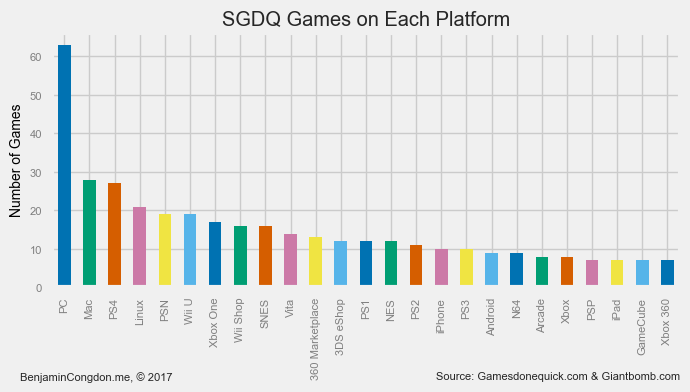

In [23]:
matplotlib.use('agg')

plt.style.use('fivethirtyeight')

plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.titlesize'] = 12

palette = itertools.cycle(sns.color_palette('colorblind', 25))

platforms = list()
for game in actual_games:
    if 'platforms' in game['data'] and game['data']['platforms']:
        platforms += ([x['name'] for x in game['data']['platforms']])
platforms = pd.Series(platforms)
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)
ax = platforms.value_counts()[:25].plot(kind='bar', color = [palette.next() for x in range(25)])

ax.set_xticklabels([platform_names[x] for x in platforms.value_counts()[:25].index])

plt.ylabel('Number of Games')
plt.title("{} Games on Each Platform".format(EVENT_SHORTHAND))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
add_info(ax, 1, -.35, -.05, -.35)
save_renders('general_platform_counts')

## Release Year Histogram


Earliest Release
title                Marble Madness
duration            0 days 00:05:00
runner                      Elipsis
platform                        NES
release_date    1984-12-15 00:00:00
Name: 60, dtype: object

Latest Release
title                 Hollow Knight
duration            0 days 00:55:00
runner                      Ourolen
platform                         PC
release_date    2017-02-24 00:00:00
Name: 41, dtype: object

Min Duration
title                Marble Madness
duration            0 days 00:05:00
runner                      Elipsis
platform                        NES
release_date    1984-12-15 00:00:00
Name: 60, dtype: object

Max Duration
title             Final Fantasy VII
duration            0 days 08:00:00
runner                     ajneb174
platform                         PC
release_date    1997-01-31 00:00:00
Name: 120, dtype: object


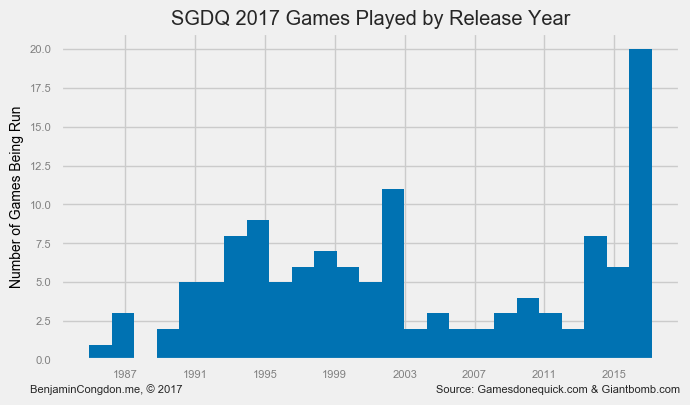

In [22]:

actual_games[0]['data']
game_frame = pd.DataFrame()

game_frame['title'] = [x['title'] for x in actual_games]
game_frame['duration'] = [str(x['duration']) for x in actual_games]
game_frame['runner'] = [x['runner'] for x in actual_games]
game_frame['platform'] = [x['platform'] for x in actual_games]
game_frame['release_date'] = [x['data']['original_release_date'] if 'original_release_date' 
                           in x['data'] else None for x in actual_games]
game_frame['release_date'] = pd.to_datetime(game_frame['release_date'])
game_frame['duration'] = pd.to_timedelta(game_frame['duration'])

print "\nEarliest Release"
print game_frame.ix[game_frame['release_date'].idxmin()]
print "\nLatest Release"
print game_frame.ix[game_frame['release_date'].idxmax()]

print "\nMin Duration"
print game_frame.ix[game_frame['duration'].idxmin()]
print "\nMax Duration"
print game_frame.ix[game_frame['duration'].idxmax()]

figure, ax = plt.subplots(figsize=(720/100, 475/100), dpi=100)
game_frame['release_date'].hist(bins=25, ax=ax, color=sns.color_palette('colorblind', 25)[0])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title('{} {} Games Played by Release Year'.format(EVENT_SHORTHAND, EVENT_YEAR))
plt.ylabel('Number of Games Being Run')
add_info(ax, 1, -0.09, -.05, -0.09)
save_renders('num_games_by_year')

## Release Year vs. Playtime

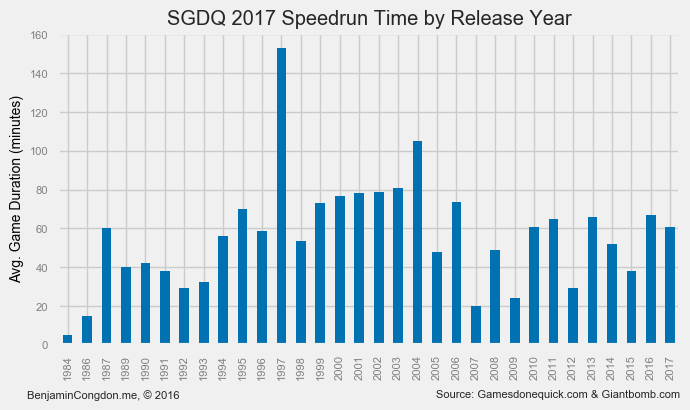

In [6]:
duration_grouped = game_frame.groupby(lambda x: game_frame.ix[x]['release_date'].year)
duration_by_year = duration_grouped.aggregate(np.sum)['duration'].astype('timedelta64[m]')
mean_duration_by_year = duration_by_year / duration_grouped.count()['duration']
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)
ax = mean_duration_by_year.plot(kind='bar', color = sns.color_palette('colorblind', 25)[0])
xtl = [item.get_text()[:4] for item in ax.get_xticklabels()]
_=ax.set_xticklabels(xtl)
plt.ylabel("Avg. Game Duration (minutes)")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

add_info(ax, 1, -0.16, -.05, -0.16)

plt.title("{} {} Speedrun Time by Release Year".format(EVENT_SHORTHAND, EVENT_YEAR))
save_renders('time_by_release_date')

## Speed Run Scatter

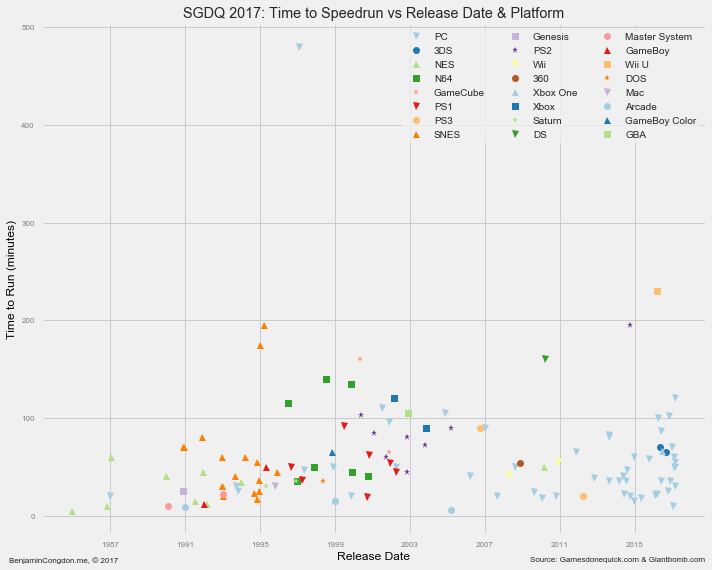

In [25]:
game_frame['minutes'] = game_frame['duration'].astype('timedelta64[m]')
game_frame_corrected = game_frame[pd.notnull(game_frame['release_date'])]
game_frame_corrected = game_frame_corrected.reset_index()
import itertools

platforms = game_frame_corrected['platform'].unique()
palette = itertools.cycle(sns.color_palette('Paired', 21))
color_dict = dict()
for p in platforms:
    color_dict[p] = palette.next()
def map_platform(platform):
    if platform in color_dict:
        return color_dict[platform]
    else:
        return "r"
    
mapped_platforms = list(map_platform(x) for x in game_frame_corrected['platform'])


markers = itertools.cycle(['v', 'o', '^', 's', '*'])

fig, ax = plt.subplots(figsize=(10,8))

for platform in platforms:
    plt_series = game_frame_corrected[game_frame_corrected['platform'] == platform]
    ax.plot_date(x=plt_series.release_date, y=plt_series.minutes,
                  color=map_platform(platform),
                  label=platform, marker=markers.next(), linewidth=1)
plt.xlabel("Release Date", fontsize=12)
plt.ylabel("Time to Run (minutes)", fontsize=12)
legend = ax.legend(loc="upper right", frameon = True, ncol=3)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor("#F0F0F0")
plt.title("{} {}: Time to Speedrun vs Release Date & Platform".format(EVENT_SHORTHAND, EVENT_YEAR))
add_info(ax, 1, -0.05, -.05, -0.05)
save_renders('running_time_v_release_date')

## Actual Platform Bar Chart

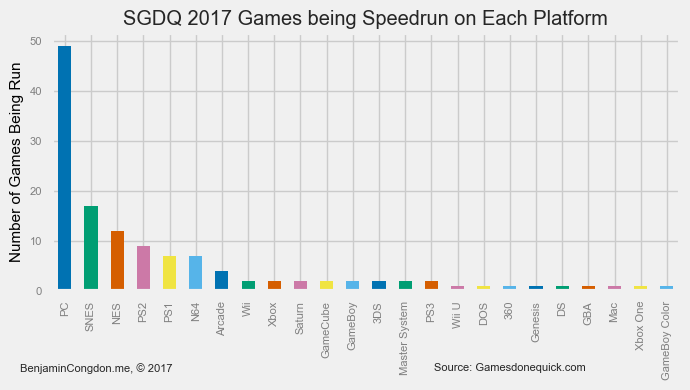

In [28]:
counts = game_frame['platform'].value_counts()
colors_for_graph = [map_platform(x) for x in counts.index]
fig, ax = plt.subplots(figsize=(720/100, 475/100), dpi=100)
ax = game_frame['platform'].value_counts().plot(kind='bar', color = sns.color_palette('colorblind', 25))
plt.ylabel("Number of Games Being Run", fontsize=11)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(.85, -0.3,'Source: Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
ax.text(-.05, -0.3, ATTRIBUTION,
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
plt.title("{} {} Games being Speedrun on Each Platform".format(EVENT_SHORTHAND, EVENT_YEAR))
save_renders('platforms_run')

## Running Time Histogram

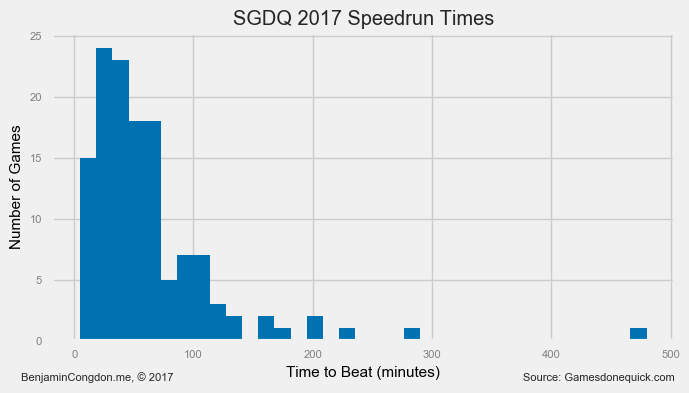

In [38]:
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)

ax = game_frame['minutes'].hist(bins=35, color=sns.color_palette('colorblind', 25)[0])
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel("Time to Beat (minutes)", fontsize=11)
plt.ylabel("Number of Games", fontsize=11)
plt.title("{} {} Speedrun Times".format(EVENT_SHORTHAND, EVENT_YEAR))
add_info(ax, 1, -0.12, -.05, -0.12, 'Source: Gamesdonequick.com')
save_renders('time_to_run_histogram')

## Genres

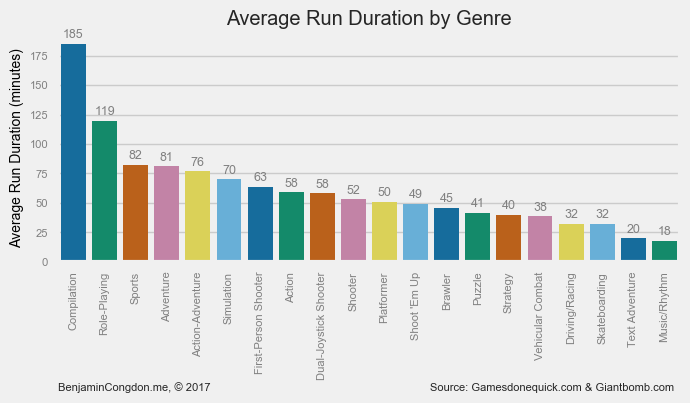

In [42]:
# Add genres to actual_games dicts
all_genres = []
for i in range(len(actual_games)):
    genres = []
    if 'genres' in actual_games[i]['data'] and actual_games[i]['data']['genres']:
        for g in actual_games[i]['data']['genres']:
            genres.append(g['name'])
            if g['name'] not in all_genres:
                all_genres.append(g['name'])
    actual_games[i]['genres'] = ','.join(genres)
games_df = pd.DataFrame(actual_games)
games_df.duration = pd.to_timedelta(games_df['duration'].apply(str))
genre_runtimes = {}
for g in all_genres:
    genre_runtimes[g] = games_df[games_df.genres.str.contains(g)].duration.astype('timedelta64[m]').mean()
genre_tuples = sorted(genre_runtimes.items(), key=itemgetter(1))
fig, ax = plt.subplots(figsize=(720/100, 475/100), dpi=100)
sns.barplot(*zip(*reversed(genre_tuples)),
            palette=sns.color_palette("colorblind"),
            ax=ax)
ax.set_ylabel("Average Run Duration (minutes)")
ax.set_title("Average Run Duration by Genre")
plt.xticks(rotation='vertical')
for p in ax.patches:
    height = p.get_height()
    t = ax.text(p.get_x() + p.get_width() / 2, height + 5,
                int(height), horizontalalignment='center')
    t.set_color('grey')
    t.set_fontsize(9)
add_info(ax, .99, -.55, 0, -.55)
save_renders('genre_runtimes')

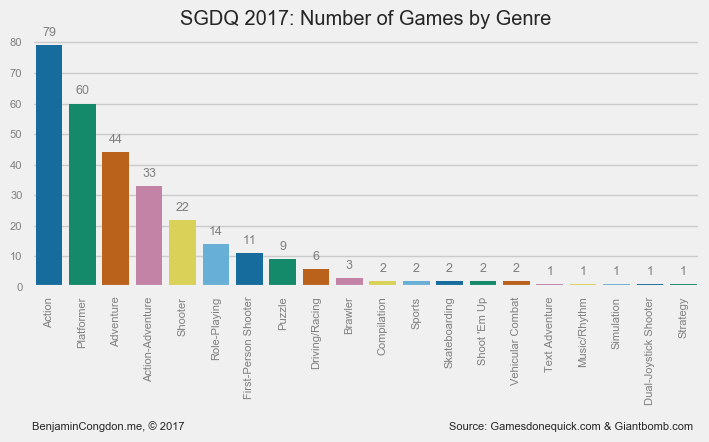

In [58]:
# Genre counts
genre_counts = {}
for g in all_genres:
    genre_counts[g] = len(games_df[games_df.genres.str.contains(g)])
fig, ax = plt.subplots(figsize=(720.0/100, 425.0/100), dpi=100)
genre_count_tuples = sorted(genre_counts.items(), key=itemgetter(1))

sns.barplot(*zip(*reversed(genre_count_tuples)),
            palette=sns.color_palette("colorblind"),
            ax=ax)
ax.set_title("{} {}: Number of Games by Genre".format(EVENT_SHORTHAND, EVENT_YEAR))
plt.xticks(rotation='vertical')
add_info(ax, .99, -.55, 0, -.55)
for p in ax.patches:
    height = p.get_height()
    t = ax.text(p.get_x() + p.get_width() / 2, height+ 3,
                int(height), horizontalalignment='center')
    t.set_color('grey')
    t.set_fontsize(9)
save_renders('genre_counts')